<a href="https://colab.research.google.com/github/Bolt-H/EEG_on_off/blob/main/Sports_Image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Load data

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# prompt: delete the directory sports_images_local

import shutil
import os

dir_to_delete = 'sports_images_local'
if os.path.exists(dir_to_delete):
    shutil.rmtree(dir_to_delete)
    print(f"Directory '{dir_to_delete}' deleted.")
else:
    print(f"Directory '{dir_to_delete}' does not exist.")

Directory 'sports_images_local' does not exist.


In [4]:
filepath = '/content/drive/MyDrive/Sports_Image_classification/archive (3).zip'
local_data_dir = '/content/sports_images_local'
extract_path = local_data_dir


from zipfile import ZipFile

with ZipFile(filepath, 'r') as zip:
  zip.extractall(extract_path)

ข้อมูลไม่ได้มาเป็น Dataframe ของ Pandas
เลยต้องเอา filepath ของรูปภาพ ของแต่ละชนิด
มาใส่ใน Dataframe และ Label

Train Data

In [5]:
import pandas as pd
import os

# ที่นำทางไป folder train
train_dir = local_data_dir + '/train/'
# list ทุก folder ที่อยู่ใน folder train
dir_name=[]
dir_name = os.listdir(train_dir)
image_path=[]
labels = []

# ลูปวนทุก folder ที่อยู่ใน folder train
for i in range(len(dir_name)):
  # เก็บชื่อ folder นั้นไว้เพื่อ label ในภายหลัง
  temp_labels = dir_name[i]
  # เก็บ folder path ไว้เพื่อสร้าง image path ภายหลัง
  folder_path = train_dir + dir_name[i] + '/'
  # list ทุก file ที่อยู่ใน folder นั้น
  file_name = os.listdir(folder_path)
  # ลูปวน ทุกfile ที่อยู่ใน folder
  for j in range(len(file_name)):
    # เพิ่ม path สำหรับรูปภาพนั้น เข้าไปใน list image_path
    image_path.append(folder_path + file_name[j])
    # เพิ่ม label สำหรับรูปภาพนั้น เข้าไปใน list lebels
    labels.append(temp_labels)

# Create the DataFrame
df = pd.DataFrame({'filepath': image_path, 'label': labels})

# Display the head of the DataFrame
display(df.head(20))

,filepath,label
0,/content/sports_images_local/train/tug of war/...,tug of war
1,/content/sports_images_local/train/tug of war/...,tug of war
2,/content/sports_images_local/train/tug of war/...,tug of war
3,/content/sports_images_local/train/tug of war/...,tug of war
4,/content/sports_images_local/train/tug of war/...,tug of war
5,/content/sports_images_local/train/tug of war/...,tug of war
6,/content/sports_images_local/train/tug of war/...,tug of war
7,/content/sports_images_local/train/tug of war/...,tug of war
8,/content/sports_images_local/train/tug of war/...,tug of war
9,/content/sports_images_local/train/tug of war/...,tug of war


Test Data

In [6]:
test_dir = local_data_dir + '/test/'
dir_name = []
dir_name = os.listdir(test_dir)
image_path = []
labels = []

for i in range(len(dir_name)):
  temp_labels = dir_name[i]
  folder_path = test_dir + temp_labels + '/'
  file_name = os.listdir(folder_path)
  for j in range(len(file_name)):
    image_path.append(folder_path + file_name[j])
    labels.append(temp_labels)

df_test = pd.DataFrame({'filepath': image_path, 'label': labels})

display(df_test.head(20))


,filepath,label
0,/content/sports_images_local/test/tug of war/3...,tug of war
1,/content/sports_images_local/test/tug of war/5...,tug of war
2,/content/sports_images_local/test/tug of war/4...,tug of war
3,/content/sports_images_local/test/tug of war/1...,tug of war
4,/content/sports_images_local/test/tug of war/2...,tug of war
5,/content/sports_images_local/test/archery/3.jpg,archery
6,/content/sports_images_local/test/archery/5.jpg,archery
7,/content/sports_images_local/test/archery/4.jpg,archery
8,/content/sports_images_local/test/archery/1.jpg,archery
9,/content/sports_images_local/test/archery/2.jpg,archery


## Data Exploration

Explore train data

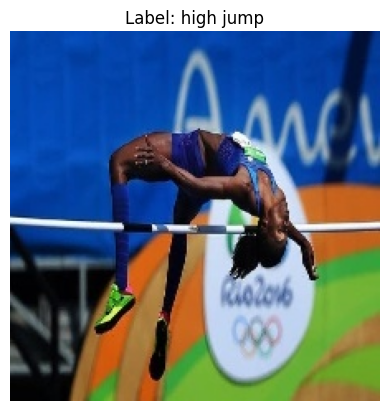

In [7]:
# import library ที่ใช้เกี่ยวกับรูปภาพ
from PIL import Image
# import library ที่ใช้เพื่อสร้างกราฟ
import matplotlib.pyplot as plt
# import library ที่ใช้เพื่อสุ่มเลข
import random

# สุ่มเลขมาหนึ่งเลขจาก 0 ถึง len(df) ก็คือจำนวนข้อมูลทั้งหมด
n = random.randint(0, len(df))
# เอา filepath ที่ n จาก column filepath จาก dataframe df
first_image_filepath = df['filepath'][n]

# เปิดรูปภาพออกมา
img = Image.open(first_image_filepath)

# พล็อตกราฟไม่ต้องเข้าใจก็ได้ให้ chat ช่วยเขียนได้
# เอารูปภาพไปทำเป็นกราฟ
plt.imshow(img)
plt.axis('off')
plt.title(f"Label: {df['label'][n]}") # ใส่ label ของกีฬา
plt.show()

Explore Test Data

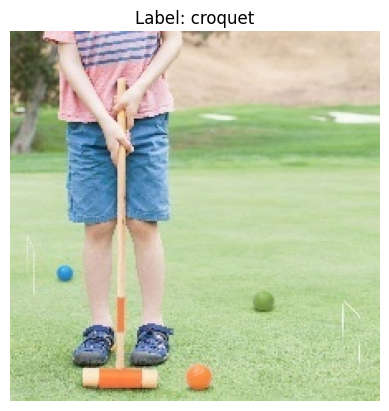

In [8]:
# เหมือนอันที่แล้ว แต่เป็น test data
n = random.randint(0, len(df_test))
first_image_filepath = df_test['filepath'][n]

img = Image.open(first_image_filepath)

plt.imshow(img)
plt.axis('off')
plt.title(f"Label: {df_test['label'][n]}")
plt.show()

## Data Augmentation

ต้องดูด้วยว่าข้อมูลที่แยกไปมีการแบ่งสัดส่วนกันยังไง ไม่ให้ Overfitting หรือ Underfitting บางข้อมูลเกินไป

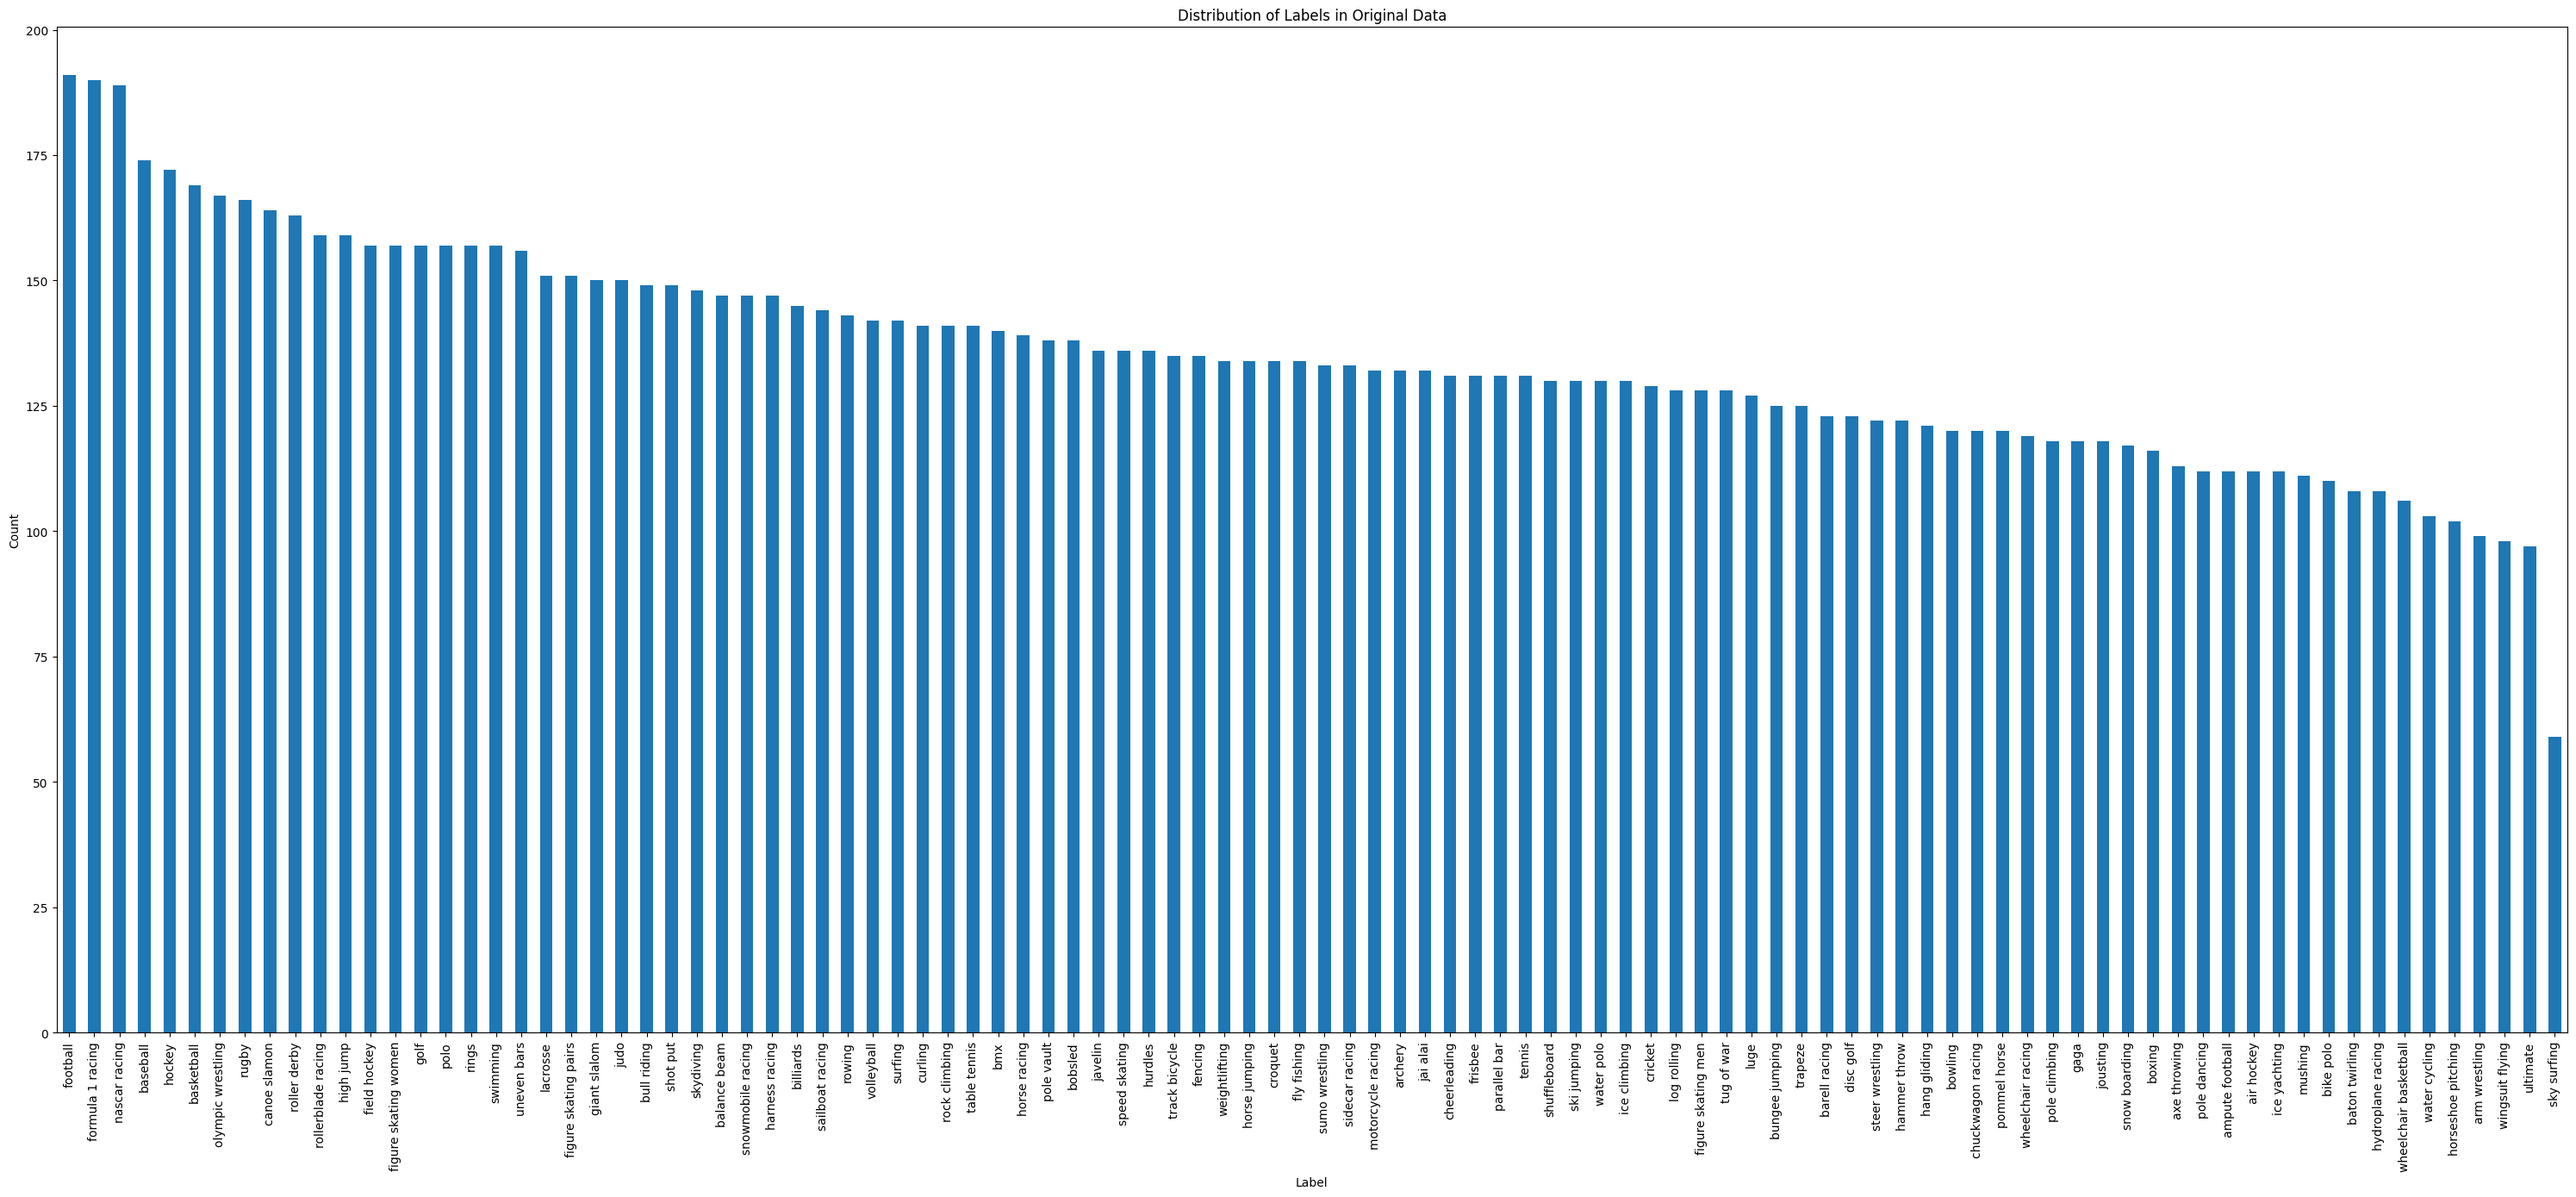

In [9]:
# ต้องการทำกราฟเพื่อแสดงการกระจายตัวของข้อมูล
import matplotlib.pyplot as plt

# Get the value counts for the labels in the original DataFrame
df_label_counts = df['label'].value_counts()

plt.figure(figsize=(30, 14))
df_label_counts.plot(kind='bar')
plt.title('Distribution of Labels in Original Data')
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

เราจะเห็นว่าข้อมูลกระจายตัวไม่สม่ำเสมอ เพราะฉะนั้นเราจะทำการเพิ่มข้อมูลทุกข้อมูลโดยการ copy เรียกว่า
1. SampleOverSampler เพื่อให้ง่ายในการเข้าใจ

2. และหลังจากนั้นก็จะทำการดัดแปลงรูปภาพ การยืดหด ต่างๆ เพื่อลด over กับ under fitting

แต่ว่าต้องเปลี่ยน scale ของภาพก่อนเข้า model ด้วย
จาก 0-255 ให้อยู่ใน scale 0-1 (normalization)

### Probelm:
1. I need to adjust what I have done here
2. wait for the GPU access
3. adjust the model and datagen

### SampleOverSampler

In [10]:
from imblearn.over_sampling import RandomOverSampler

# ทำการเพิ่มข้อมูลแบบ random จาก label ที่มีข้อมูน้อยให้มีข้อมูลเท่ากับ majority
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(df[['filepath']], df['label'])

# ทำการนำข้อมูลนี้ไปใส่ใน Dataframe
# ปกติจะใช้ pd.concat เพิ่อเชื่อมสอง Dataframe แต่ว่าในที่นี้ ros return ออกมาเป็น array การสร้าง dataframe ใหม่เลยก็จะดีกว่า
df = pd.DataFrame({'filepath': X_resampled.iloc[:, 0], 'label': y_resampled})

เรามาดูการกระจายตัวของข้อมูลอีกรอบ

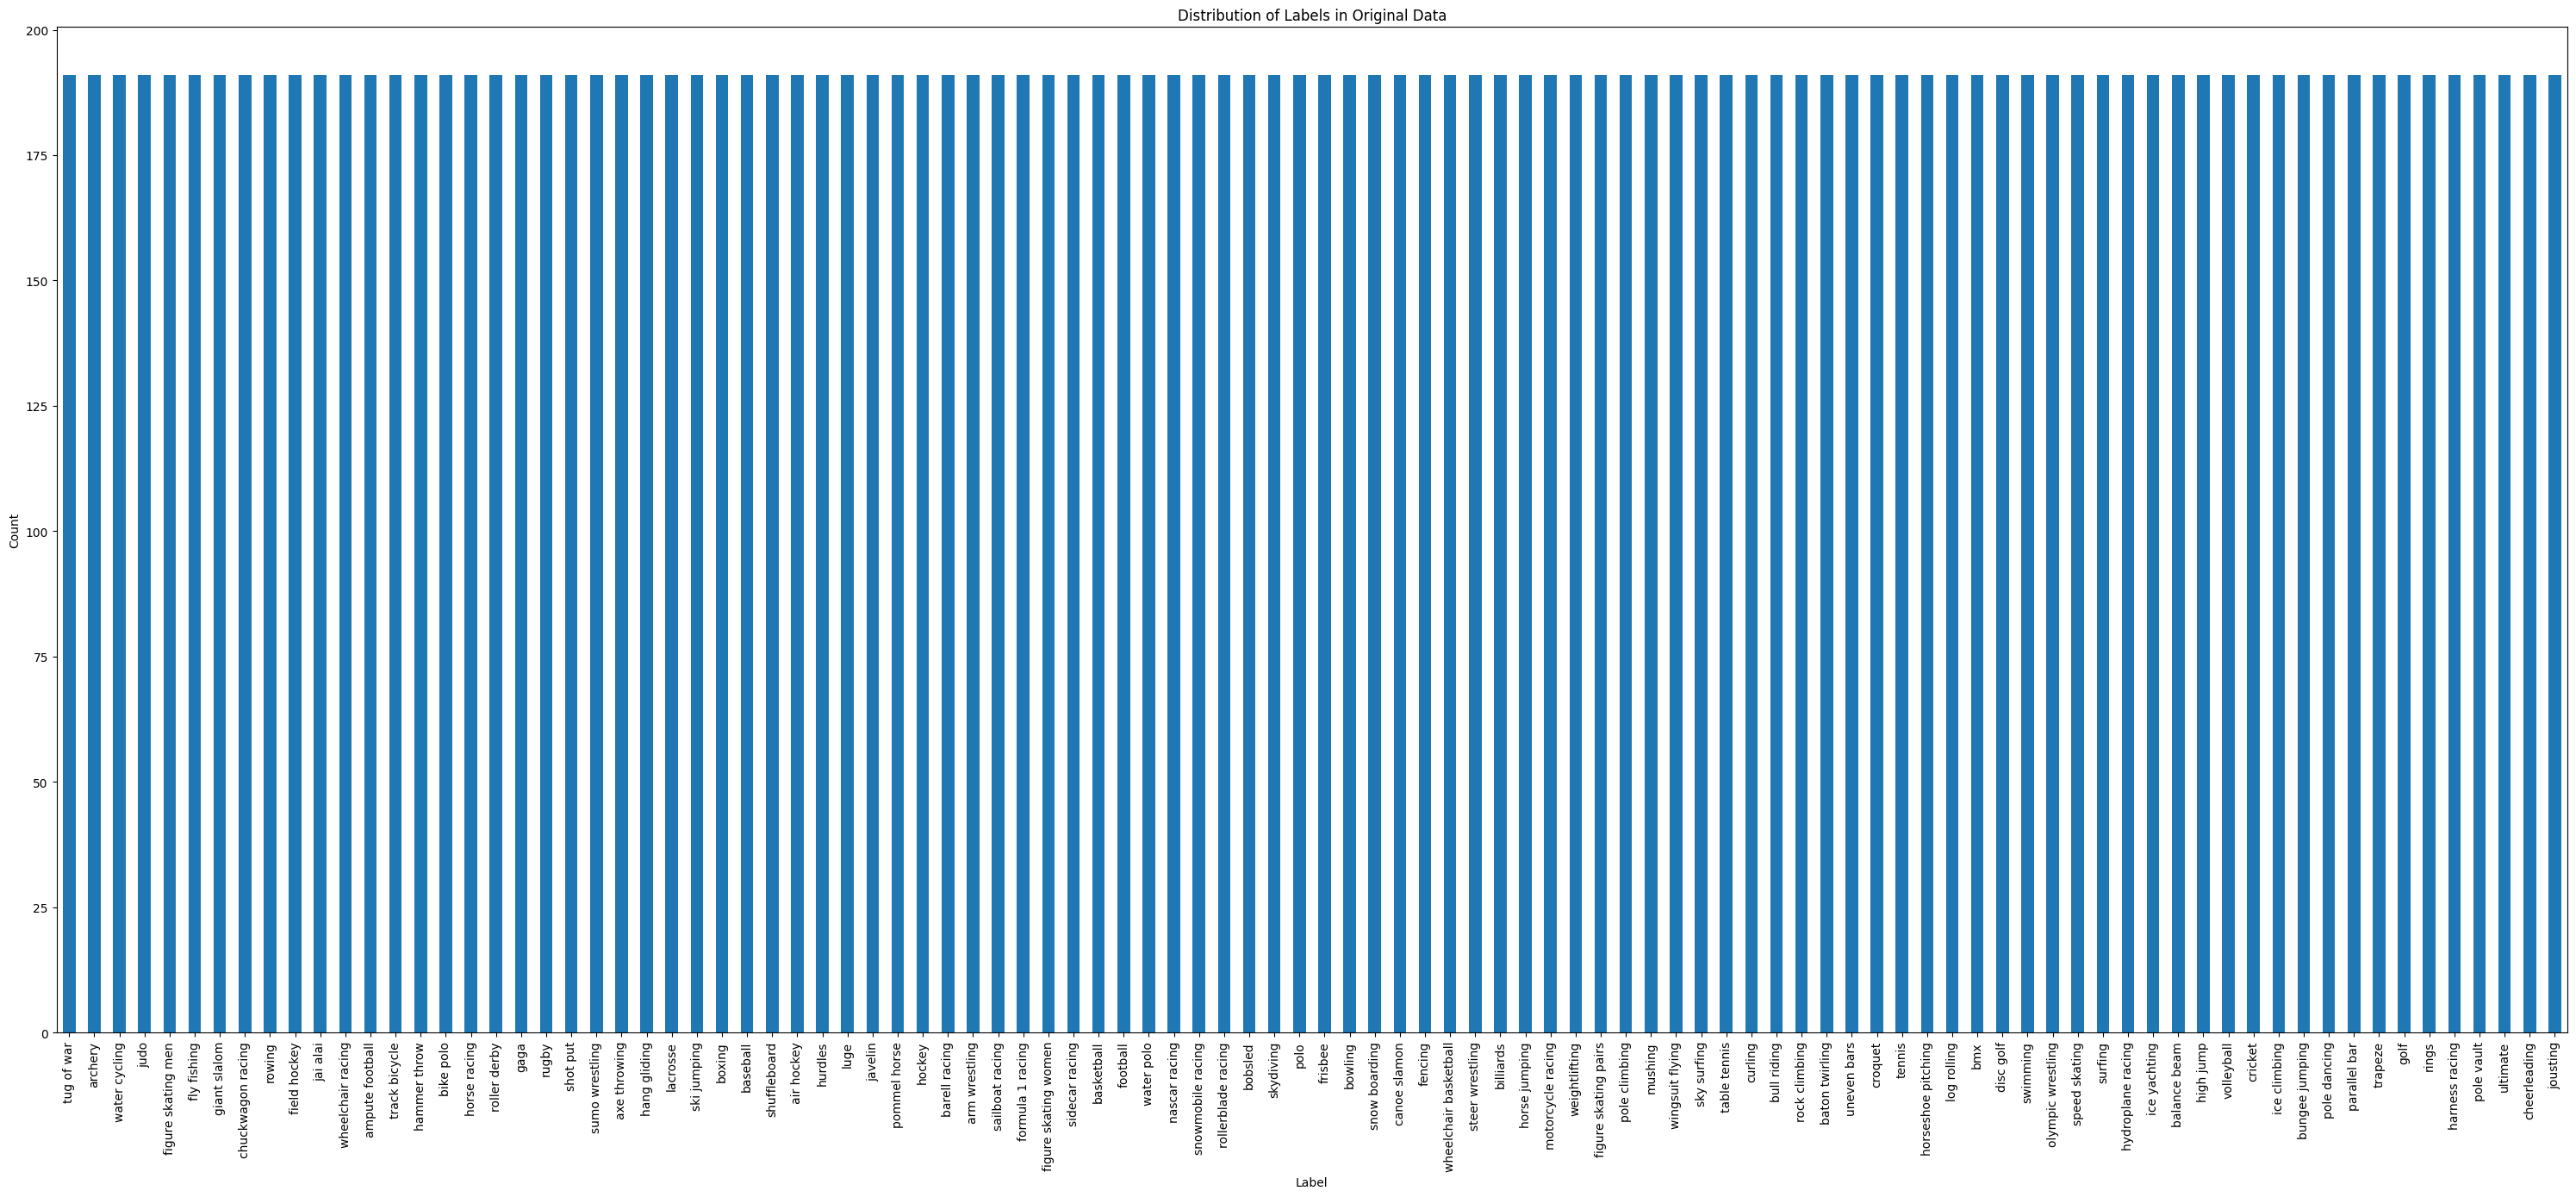

In [11]:
# ต้องการทำกราฟเพื่อแสดงการกระจายตัวของข้อมูล
import matplotlib.pyplot as plt

# Get the value counts for the labels in the original DataFrame
df_label_counts = df['label'].value_counts()

plt.figure(figsize=(30, 14))
df_label_counts.plot(kind='bar')
plt.title('Distribution of Labels in Original Data')
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Train Test Split

In [12]:
# จะทำการ train model ได้ต้องแบ่งข้อมูลเป็น
"""
1. Train data (แบบฝึกหัด ใช้ปรับ weight กับ bias)
2. Validation data (Quiz เพื่อดูว่า model จะควรหยุด train หรือ train ต่อ หรือ ปรับ learning rate ยังไง)
3. Test data (สอบปลายภาค วัดผลสุดท้าย)
"""

from sklearn.model_selection import train_test_split

labels = df[['label']]
# แยกข้อมูลเป็น Train กับ Validation with stratification
X_train, X_val = train_test_split(df, test_size=0.2, stratify=df[['label']], random_state=42)
# train_X กับ val_X output ออกมาเป็น numpy array เลยต้องใส่ .values ไปข้างหลัง test_X เพื่อให้กลายเป็น Numpy array
X_train.shape
X_val.shape
print(X_train[:5])
print(X_val[:5])

                                                filepath            label
12992  /content/sports_images_local/train/harness rac...   harness racing
1600   /content/sports_images_local/train/ampute foot...  ampute football
10000  /content/sports_images_local/train/tennis/060.jpg           tennis
18563  /content/sports_images_local/train/uneven bars...      uneven bars
2858   /content/sports_images_local/train/sumo wrestl...   sumo wrestling
                                                filepath  \
11451  /content/sports_images_local/train/balance bea...   
18855  /content/sports_images_local/train/wheelchair ...   
4543   /content/sports_images_local/train/hockey/056.jpg   
15748  /content/sports_images_local/train/horse jumpi...   
3098   /content/sports_images_local/train/hang glidin...   

                       label  
11451           balance beam  
18855  wheelchair basketball  
4543                  hockey  
15748          horse jumping  
3098            hang gliding  


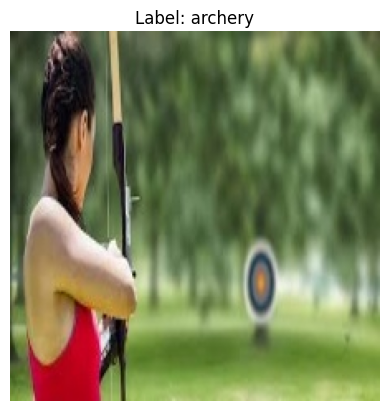

In [13]:
# สุ่มเลขมาหนึ่งเลขจาก 0 ถึง len(df) ก็คือจำนวนข้อมูลทั้งหมด
n = random.randint(0, len(X_train))
# เอา filepath ที่ n จาก column filepath จาก dataframe df
first_image_filepath = X_train['filepath'][n]

# เปิดรูปภาพออกมา
img = Image.open(first_image_filepath)

# พล็อตกราฟไม่ต้องเข้าใจก็ได้ให้ chat ช่วยเขียนได้
# เอารูปภาพไปทำเป็นกราฟ
plt.imshow(img)
plt.axis('off')
plt.title(f"Label: {X_train['label'][n]}") # ใส่ label ของกีฬา
plt.show()

In [14]:
# check ดูว่าข้อมูลอยู่ในรูปแบบเดียวกันทั้งสามรึปล่าว
X_train.info()
X_val.info()
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15280 entries, 12992 to 9686
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   filepath  15280 non-null  object
 1   label     15280 non-null  object
dtypes: object(2)
memory usage: 874.2+ KB
<class 'pandas.core.frame.DataFrame'>
Index: 3820 entries, 11451 to 7839
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   filepath  3820 non-null   object
 1   label     3820 non-null   object
dtypes: object(2)
memory usage: 89.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   filepath  500 non-null    object
 1   label     500 non-null    object
dtypes: object(2)
memory usage: 7.9+ KB


Head of train_X:


,filepath,label
12992,/content/sports_images_local/train/harness rac...,harness racing
1600,/content/sports_images_local/train/ampute foot...,ampute football
10000,/content/sports_images_local/train/tennis/060.jpg,tennis
18563,/content/sports_images_local/train/uneven bars...,uneven bars
2858,/content/sports_images_local/train/sumo wrestl...,sumo wrestling



Shape of train_X:
(15280, 2)

Head of val_X:


,filepath,label
11451,/content/sports_images_local/train/balance bea...,balance beam
18855,/content/sports_images_local/train/wheelchair ...,wheelchair basketball
4543,/content/sports_images_local/train/hockey/056.jpg,hockey
15748,/content/sports_images_local/train/horse jumpi...,horse jumping
3098,/content/sports_images_local/train/hang glidin...,hang gliding



Shape of val_X:
(3820, 2)


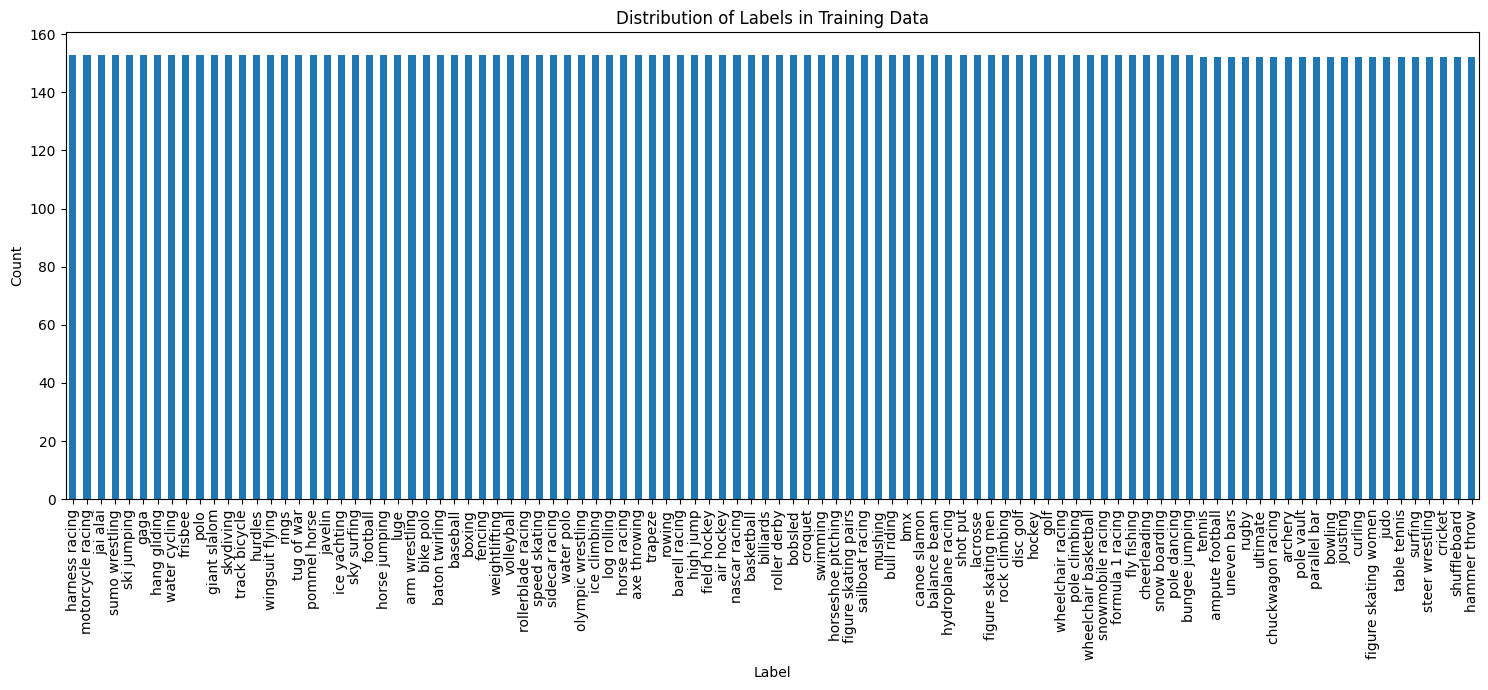

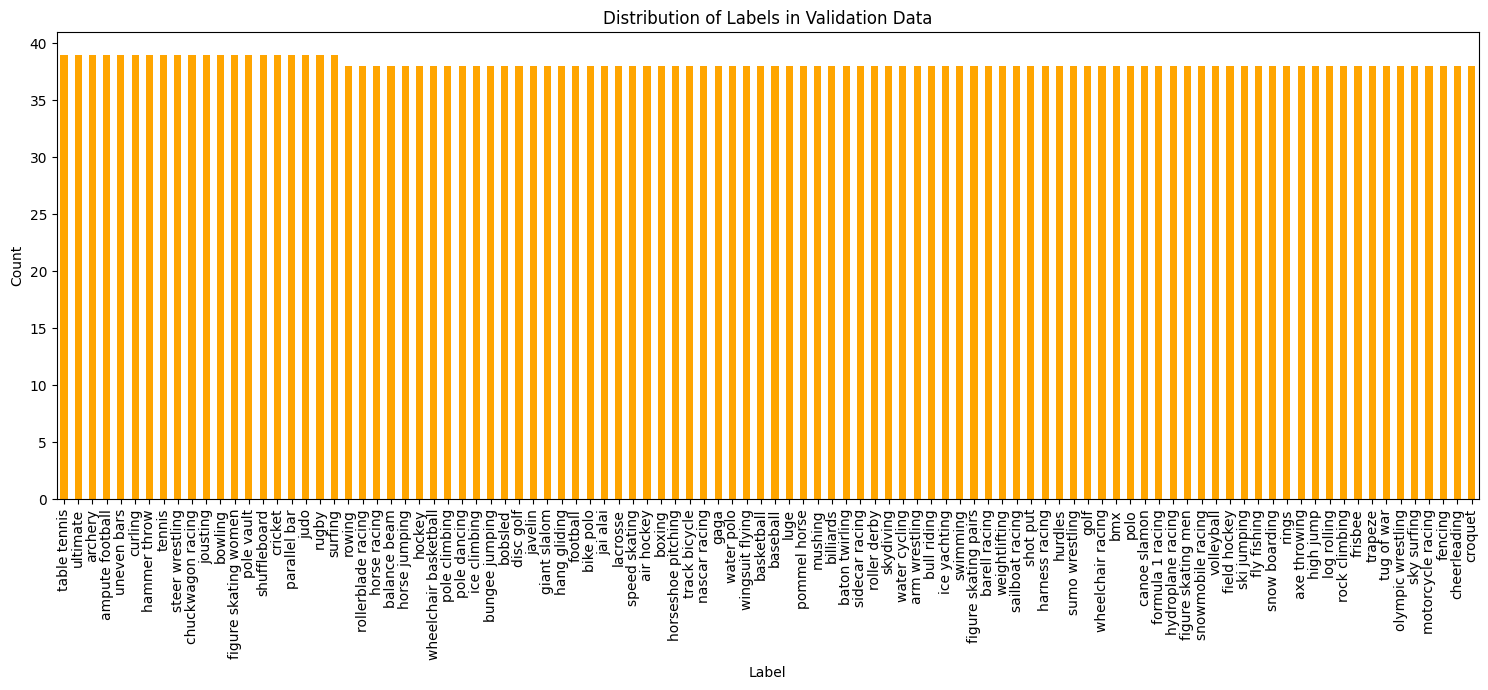

In [15]:
# หลังจากแยกเสร็จเราก็จะมาดูข้อมูลของเราอีกรอบ

import matplotlib.pyplot as plt
import pandas as pd # Ensure pandas is imported if not already

# Display the head of the training features (filepaths)
print("Head of train_X:")
display(X_train.head())

# Display the shape of the training features
print("\nShape of train_X:")
print(X_train.shape)

# Display the head of the validation features (filepaths)
print("\nHead of val_X:")
display(X_val.head())

# Display the shape of the validation features
print("\nShape of val_X:")
print(X_val.shape)

# Get the value counts for the training labels
train_label_counts = X_train['label'].value_counts()

# Get the value counts for the validation labels
val_label_counts = X_val['label'].value_counts()

# Create a bar plot for the training label distribution
plt.figure(figsize=(15, 7))
train_label_counts.plot(kind='bar')
plt.title('Distribution of Labels in Training Data')
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks(rotation=90) # Rotate x-axis labels for better readability
plt.tight_layout() # Adjust layout to prevent labels overlapping
plt.show()

# Create a bar plot for the validation label distribution
plt.figure(figsize=(15, 7))
val_label_counts.plot(kind='bar', color='orange')
plt.title('Distribution of Labels in Validation Data')
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks(rotation=90) # Rotate x-axis labels for better readability
plt.tight_layout() # Adjust layout to prevent labels overlapping
plt.show()

## Data Preparation

### Data  Generator
หลังจากแบ่ง
อันนี้จะเป็นขั้นตอนเตรียมข้อมูลให้พร้อมโดย การดึงรูปภาพจาก filepath ใน Dataframe เลย
Data_Generator
Key:
1. Train generator
  - ยืดบน
  - ยืดข้าง
  - หมุน
  - กลับซ้ายขวา
  - เอียง
  - ซูม
2. Test generator
  - เปลี่ยน scale เฉยๆ
using:
1. ImageDataGenerator
2. flow_from_dataframe
  - เป็น method นึงใน ImageDataGenerator
  - ใช้สร้างชุดข้อมูลรูปภาพโดยตรง จาก Dataframe เลยที่มี filepath กับ labels อยู่
  - method นี้จะอ่าน file รูปภาพจาก filepath และจะทำการ data augmentation ที่ตั้งค่าไว้ใน ImageDataGenerator
  - Output เป็น Labels กับ ชุกข้อมูลรูป

In [ ]:
# คำสั่ง pip ใน python ใช้โหลด tensorflow
!pip install tensorflow

In [16]:
# การใช้งาน ImageDataGenerator
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# setup ตัว generator ก่อน
# แบ่งเป็น data_gen สำหรับ train กับ test เพราะว่าใน test ไม่ได้มีการดัดแปรงรูป แค่เปลี่ยน scale เฉยๆ
train_datagen = ImageDataGenerator(
    # เปลี่ยน scale จาก 0-255 เป็น 0-1
    rescale=1./255,
    # หมุนภาพ
    rotation_range=20,
    # เติมภาพที่ขาด
    fill_mode = 'reflect',
    # ยืดบนยืดข้าง
    width_shift_range=0.2,
    height_shift_range=0.2,
    # เฉียงภาพ
    shear_range=0.2,
    # zoom ภาพ
    zoom_range=0.2,
    # กลับซ้ายขวา
    horizontal_flip=True,
)

test_datagen = ImageDataGenerator(
    rescale=1./255
)

In [17]:
# หลังจาก set up เสร็จแล้วก็ทำการ เชื่อมข้อมูลจาก Dataframe กับ filepath เข้ากับ Datagenerator
# โดยใช้ flow_from_dataframe หมายถึง ไหลจาก dataframe
# แบ่งเป็นสองอันเหมือนเดิม 1.train 2. test
# กำหนดขนาดภาพ (มีอธิบายต่อใน train_datagen)
image_size= 224
# จำนวน sample ที่ใช้ train ก่อนเปลี่ยน weight and bias
# 10k = 16-32
# 10K - 100k = 64-128
# เราน่าจะต้องใช้ 64 เพราะ ข้อมูลเกือบ 20k
batch_size= 64

train_generator = train_datagen.flow_from_dataframe(
    # ใส่ Dataframe ที่ต้องการให้ข้อมูลไหลเข้ามา
    dataframe=X_train,

    # ตรงนี้ปกติจะใส่ directory ด้วยแต่ว่า folder กับ file ที่เราได้มาไม่ได้อยู่ใน folder รวมใหญ่เราเลยต้องแยก filepath ของแต่ละรูปออกมา
    # ซึ่งถ้าใน X_col มี filepath ที่ครบถ้วนอยู่แล้วก็ไม่จำเป็นต้องใส่คำสั่งนี้

    # บอกว่า column ที่เป็น x(feature) คืออะไร
    x_col='filepath',
    # บอกว่า column ที่เป็น y(target) คืออะไร
    y_col='label',
    # บอกว่าต้องการรูปภาพขนาดเท่าไหร่ (แล้วแต่ ที่ดีก็ 244 ถ้าอยากได้ acuuracy เยอะๆ ก็เพิ่มเป็ 288/320)
    # ทำหารย่อรูปภาพโดยใช้ Interpolation คำนวณค่า pixel ใหม่อิงจากก pixel เดิม
    # สมการ
    target_size=(image_size, image_size),
    # กำหนด batch size ที่เหมาะสมยิ่งมากยิ่ง train นาน เหมาะกับ dataset เยอะๆ
    batch_size=batch_size,
    # อันนี้จะเป็นการ เปลี่ยน label จากคำ เป็น [0,1,0,...,0] มีหนึ่งร้อยตัวในนี้ 1 ตัวในนั้นหมายถึง 1 กีฬา
    # เป็นการแยกปลายทางออกเป็นหลายๆ node
    # ใช้สมการ categorial_crossentropy แทน
    class_mode='categorical',
)

val_generator = test_datagen.flow_from_dataframe(
    dataframe=X_val,
    x_col='filepath',
    y_col='label',
    target_size=(image_size, image_size),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False,
)

test_generator = test_datagen.flow_from_dataframe(
    dataframe=df_test,
    x_col='filepath',
    y_col='label',
    target_size=(image_size, image_size),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False,
)

Found 15278 validated image filenames belonging to 100 classes.
Found 3820 validated image filenames belonging to 100 classes.
Found 500 validated image filenames belonging to 100 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/legacy/preprocessing/image.py:920: UserWarning: Found 2 invalid image filename(s) in x_col="filepath". These filename(s) will be ignored.
  warnings.warn(


## Deep Learning model
จุดมุ่งหมาย:
- แยกรูปว่ารูปนี้อยู่ใน กีฬาไหน
- จากภาพที่ถูฏดัดแปลงเป็น 244x244
- มี 100 กีฬา
- input RGB images (3 channels)
- output 100 classes
- expected input size = 224x224x3
1. Convolutional Layers สัก 2-3 ชั้น
  - นี้คือชั้นที่ใช้ในการเอาข้อมูลสำคัญออกจากภาพโดย ใช้ kernel หลายๆรูปแบบ ที่ตรวจจับหลายๆ feature อย่างเช่น เส้นขอบ จุด ต่างๆ
  - kernel ขนาดสี่เหลียม ตัวอย่าง 3x3
  - kernel ตรวจจับขอบ :
  1. [-1,-2,1]
  2. [0,0,0]
  3. [-1,-2,1]
  layers:
  1. 32 features using 3x3 kernel (filters) extract some basic edge line shape
    - activation: ReLU (สมการใช้เพื่อให้ข้อมูลอยู่ในช่างที่ต้องการ สมการนี้ง่ายทำให้การคำนวณเร็ว)
    - หลังจาก conv เราจะได้ภาพขนาดเดิม
    - แต่ละ feature จะมีภาพเป็นของตัวเอง
    - เหมือนภาพซ้อนๆ กัน 32 ชั้นแต่ละชั้นคัดแยกคนละอย่าง
  2. MaxPooling2D (ใช้เพื่อลดขนาดของภาพ)
  จาก 224x224 เป็น 112x112 ใช้ pooling ขนาด 2x2 เหลือ 1x1
  3. 64 features using 3x3 kernel
    - features เพิ่มเพื่อตรวจจับ pattern ได้มากขึ้น
    - activation: ReLU
  4. MaxPooling2D (2,2)
    - 112x112 -> 56x56
  5. 128 features using  3x3 kernel
  6. MaxPooling2D (2,2)
    - 56x56 -> 28x28
2. Flatten()
  - เปลี่ยนจาก 2D เป็น 1D เพื่อตรวจสอบ
3. Dense x3
  - เป็นชั้นการ classification
  - fully connected neural network

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, Activation, GlobalAveragePooling2D
from tensorflow.keras.applications import EfficientNetV2B0 # Changed from EfficientNet80
from tensorflow.keras import mixed_precision
efficientnet = EfficientNetV2B0(include_top=False, weights='imagenet', input_shape=(image_size, image_size, 3))

# Set all layers to non-trainable initially
efficientnet.trainable = False

# Example: Unfreeze the last few layers for fine-tuning
# You can adjust the number of layers to unfreeze based on your needs
# To see the layer names, you can print efficientnet.summary()
for layer in efficientnet.layers[-20:]:
    if not isinstance(layer, BatchNormalization):
        layer.trainable = True

mixed_precision.set_global_policy('mixed_float16')
# red green blue
channel_size = 3

sport_model = Sequential([

    efficientnet,
    GlobalAveragePooling2D(),

    Dense(512),
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.2),

    Dense(256),
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.1),

    Dense(100, activation='softmax', dtype='float32')
])

sport_model.summary()
efficientnet.summary()

24274472/24274472 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ efficientnetv2-b0 (Functional)  │ (None, 7, 7, 1280)     │     5,919,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │       655,872 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 100)            │        25,700 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,735,284 (25.69 MB)

 Trainable params: 1,624,724 (6.20 MB)

 Non-trainable params: 5,110,560 (19.50 MB)

Model: "efficientnetv2-b0"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling           │ (None, 224, 224,  │          0 │ input_layer[0][0] │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization       │ (None, 224, 224,  │          0 │ rescaling[0][0]   │
│ (Normalization)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv (Conv2D)  │ (None, 112, 112,  │        864 │ normalization[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_bn             │ (None, 112, 112,  │        128 │ stem_conv[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_activation     │ (None, 112, 112,  │          0 │ stem_bn[0][0]     │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_co… │ (None, 112, 112,  │      4,608 │ stem_activation[… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_bn  │ (None, 112, 112,  │         64 │ block1a_project_… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_ac… │ (None, 112, 112,  │          0 │ block1a_project_… │
│ (Activation)        │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2a_expand_conv │ (None, 56, 56,    │      9,216 │ block1a_project_… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2a_expand_bn   │ (None, 56, 56,    │        256 │ block2a_expand_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2a_expand_act… │ (None, 56, 56,    │          0 │ block2a_expand_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2a_project_co… │ (None, 56, 56,    │      2,048 │ block2a_expand_a… │
│ (Conv2D)            │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2a_project_bn  │ (None, 56, 56,    │        128 │ block2a_project_… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2b_expand_conv │ (None, 56, 56,    │     36,864 │ block2a_project_… │
│ (Conv2D)            │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2b_expand_bn   │ (None, 56, 56,    │        512 │ block2b_expand_c… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2b_expand_act… │ (None, 56, 56,    │          0 │ block2b_expand_b

 Total params: 5,919,312 (22.58 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 5,919,312 (22.58 MB)

In [ ]:
import tensorflow as tf
print("Mixed precision policy:", mixed_precision.global_policy())
print("GPU available:", tf.config.list_physical_devices('GPU'))

Mixed precision policy: <DTypePolicy "mixed_float16">
GPU available: []


In [ ]:
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=5,
    min_lr=0.0001,
    verbose=1
)


early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,
    verbose=1,
    restore_best_weights=True
)


In [ ]:
from tensorflow.keras.optimizers import Adam
sport_model.compile(optimizer=Adam(learning_rate=1e-4),
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])


In [ ]:
import math
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the ModelCheckpoint callback
checkpoint = ModelCheckpoint(
    'best_sport_model.keras',  # Filename to save the model. Use .keras extension
    monitor='val_accuracy', # Metric to monitor. Use 'val_accuracy' or 'val_loss'
    save_best_only=True,    # Save only the best model based on the monitored metric
    mode='max',             # Mode can be 'auto', 'min', or 'max'. Use 'max' for accuracy, 'min' for loss
    verbose=1               # Print a message when the model is saved
)


history = sport_model.fit(
    train_generator,
    steps_per_epoch=math.ceil(train_generator.samples / batch_size),
    epochs=10,  # You can adjust the number of epochs
    validation_data=val_generator,
    validation_steps=math.ceil(val_generator.samples / batch_size),
    workers=4,
    use_multiprocessing=True,
    callbacks=[reduce_lr, early_stopping, checkpoint] # Add the checkpoint callback here
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
 57/239 ━━━━━━━━━━━━━━━━━━━━ 17:36 6s/step - accuracy: 0.0078 - loss: 4.9213

KeyboardInterrupt: 

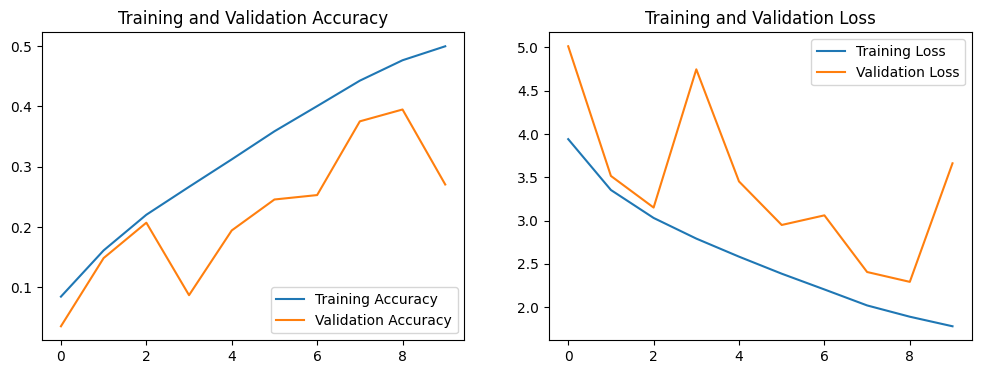

In [ ]:
# ## Plot Training History
# Access the loss and accuracy from the history object
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

จะเห็นว่าการใช้ convolutional layers ที่สร้างเองในการตรวจจับภาพนั้นไม่ค่อยดีเท่าไหร่
เพราะฉะนั้นเราจะเลือกใช้ Application for image classification on this
1. EfficientNetV2
  - Classification CNN
  - used in general purpose
  - very fast and accurate
2. ResNet50
  - Deep Residual CNN
  - good accuracy with simple structure easy to train
  - Academic and real world classification
3. DenseNet
  - Dense CNN
  - Efficient use of features, fewer parameters
  - use in Medical imaging, fine-grained classification
4. Vision Transformer (ViT)
  - Great performance on large datasets
  - High end classification tasks
5. ConvNeXt
  - Best of CNN + Transformer, fast & powerful
  - Next-gen classification
6. MobileNetV3
  - mobile
7. YOLOv8
  - Object detection (multi-task)
  - Real-time detection + classification
  - Real-time object recognition, class + box

And I want tyr all of them